# 讀取資料

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from ccuhdf import get_path, VNAxDC
# data = np.flip(data, axis=1).T
# data = data.T

In [2]:
data_filepath = get_path('.hdf5', title = 'open .hdf5 file contains MEASURMENT data.')
print('measurement data file path:\n', data_filepath)

measurement data file path:
 D:/VScode/QEL專案/mirror/Hsu_mirror-20241205T061727Z-001/Hsu_mirror/學姊的/274ms only x2=100mm_debackground.hdf5


# Plot整張圖

file:D:/VScode/QEL專案/mirror/Hsu_mirror-20241205T061727Z-001/Hsu_mirror/學姊的/274ms only x2=100mm_debackground.hdf5


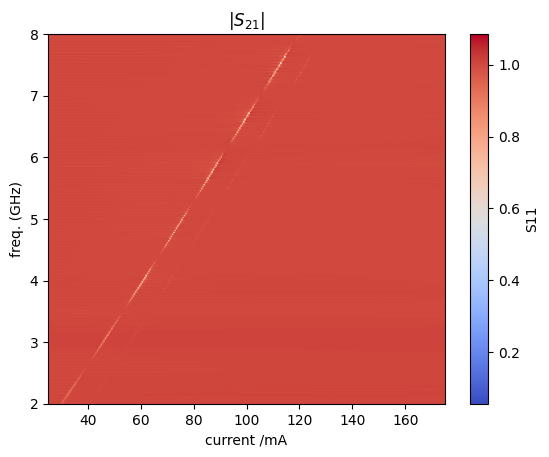

In [3]:
data = VNAxDC.get_data(data_filepath)
info = VNAxDC.get_info(data_filepath, print_info=False)
fig, ax, extent, flipfunc = VNAxDC.get_ploting_objs(info)
 
data_0 = flipfunc(data)

'''def contrast(data):

    if abs(data)>1:
    
'''
print(f'file:{data_filepath}')

im = ax.imshow(abs(data_0), cmap='coolwarm', aspect='auto',extent= extent)
plt.colorbar(im).set_label(info['VNA - trace'] )



plt.xlabel('current /mA')
plt.ylabel('freq. (GHz)')
plt.title(r'$|S_{21}|$')
#plt.text(56,3.1,f'(file:{data_filepath})', ha='center')
plt.show()

# 切個Traces(確實)

(3001, 301)


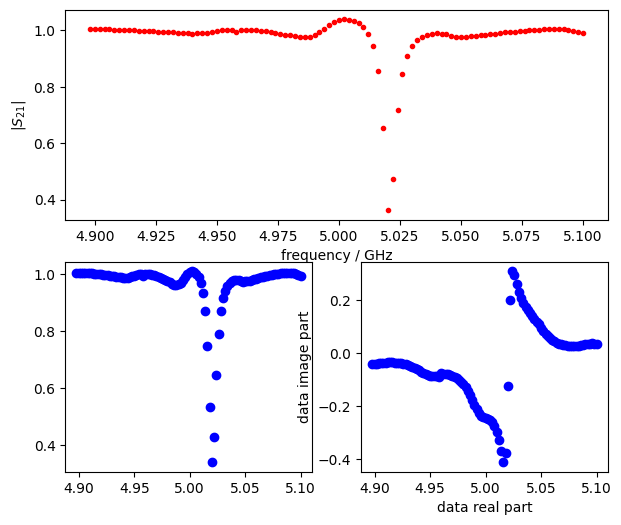

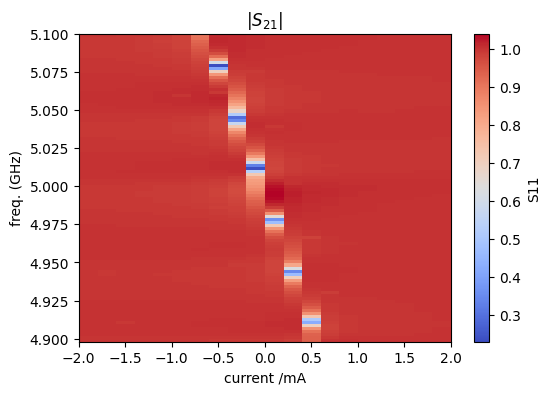

In [4]:
def get_fslice(info, frange):
    f0 = info['VNA - start frequency']
    f1 = info['VNA - stop frequency']
    nf = info['VNA - # of points']
    step = (f1 - f0) / nf
    frq = np.linspace(f0, f1, nf)
    return slice(int( (frange[0] - f0) // step - 1), 
                 int( (frange[1] - f0) // step + 1)) , frq


screen , frq= get_fslice(info, [4.9e+9,5.1e+9])  #3.5e+9,6e+9
trace_no = 102

#screen = slice(None)
s = data_0.shape
print(s)


plt.figure(figsize= (7,6))

plt.subplot(211)
#Vmax = np.maximum(abs(data[:, trace_no]), 0.3)
plt.plot(frq[screen]/1e+9, abs( data[:, trace_no:trace_no+1])[screen], 'r .')
#plt.ylim(0,0.08)
plt.xlabel( 'frequency / GHz')
plt.ylabel('$|S_{21}|$')
#plt.title(f'Trace No.{trace_no}')
plt.subplot(223)
plt.plot(frq[screen]/1e+9, np.real(data[:, trace_no:trace_no+1])[screen],'bo')
plt.subplot(224)
plt.plot(frq[screen]/1e+9, np.imag(data[:, trace_no:trace_no+1])[screen],'bo')
plt.xlabel('data real part')
plt.ylabel('data image part')
plt.title

extent = [ -2, 2, min(frq[screen]/1e+9), max(frq[screen]/1e+9)]

fig, ax = plt.subplots(figsize=(6, 4))
#plt.imshow(abs(data_0), cmap='coolwarm', aspect='auto',)
im = ax.imshow(abs(data[:,trace_no-10:trace_no+10 ])[screen], cmap='coolwarm', aspect='auto', extent = extent)
plt.colorbar(im).set_label(info['VNA - trace'] )
plt.xlabel('current /mA')
plt.ylabel('freq. (GHz)')
plt.title(r'$|S_{21}|$')
plt.show()


# 測試參數用!

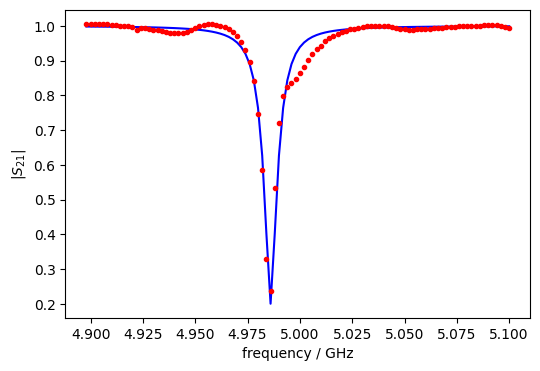

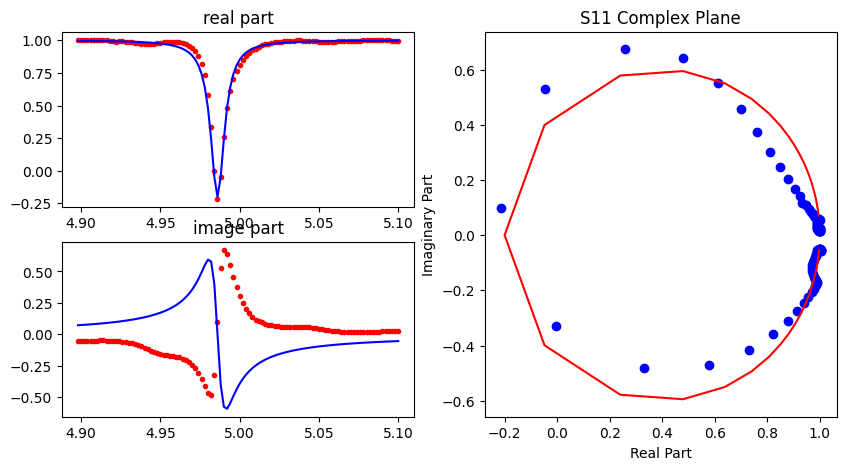

In [ ]:
def s11_ttest( omega, omega_m, alpha, kappa):
    Gamma = (alpha + kappa )/ 2
    s11 =( 1 - (kappa / (Gamma - 1j*(omega - omega_m))))
    return (s11)

omega = frq[screen]/1e+9
omega_m = 4.986
alpha = 0.0042
kappa = 0.0063
#test = s11_ttest( 2*np.pi*omega, 2*np.pi*omega_m, 2*np.pi*alpha, 2*np.pi*kappa)
test = s11_ttest( omega, omega_m, alpha, kappa)

plt.figure(figsize= (6,4))

plt.plot(frq[screen]/1e+9, (abs(test)), 'b-')
plt.plot(frq[screen]/1e+9, (abs( data[:, trace_no:trace_no+1])[screen]), 'r .')
plt.xlabel( 'frequency / GHz')
plt.ylabel('$|S_{21}|$')
plt.show() 


plt.figure(figsize=(10,5))
plt.subplot(221)
plt.plot(frq[screen]/1e+9, np.real( data[:, trace_no:trace_no+1])[screen], 'r .')
plt.plot(frq[screen]/1e+9, np.real(test), 'b-')
plt.title('real part')
plt.subplot(223)
plt.plot(frq[screen]/1e+9, np.imag( data[:, trace_no:trace_no+1])[screen], 'r .')
plt.plot(frq[screen]/1e+9, np.imag(test), 'b-')
plt.title('image part')
plt.subplot(122)
plt.plot(np.real( data[:, trace_no:trace_no+1])[screen], ( data[:, trace_no:trace_no+1])[screen].imag, 'bo')
plt.plot(np.real(test), np.imag(test), 'r-')
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.title("S11 Complex Plane")

plt.show()
plt.show()


# Fitting!

## 實虛部擬和

fitted result:
>> omega_m = 5.012027076905654
>> alpha = 0.0035785385140691523
>> kappa = 0.005031782548574521


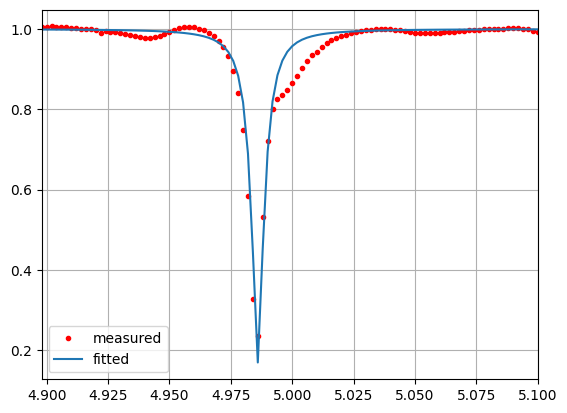

<function matplotlib.pyplot.show(close=None, block=None)>

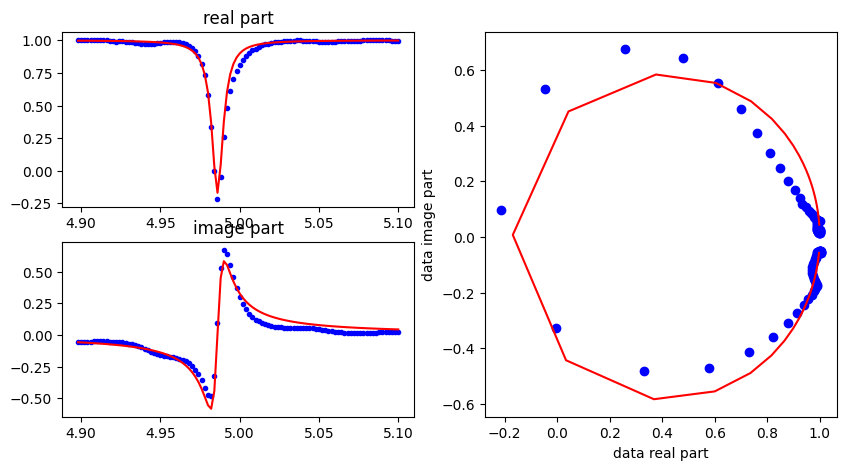

In [30]:
import numpy as np
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
#from sklearn.metrics import r2_score
import inspect

pi = np.pi
trace_no = 101


def s11( omega, omega_m, alpha, kappa):
    Gamma = (alpha + kappa )/ 2
    s11 =( 1 - (kappa / (Gamma - 1j*(omega - omega_m))))
    return np.hstack([s11.real, s11.imag])

f_used, s11_used = frq[screen]/1e+9,data[screen,trace_no: trace_no+1].ravel()
param_names = list(inspect.signature(s11).parameters.keys())[1:]
mix = np.hstack([(s11_used).real, (s11_used).imag])

strpts = np.array([4.985, 0.0042, 0.0063])# starting points

coeffs, cov = curve_fit(
    s11,
    f_used,
    ydata= np.hstack([(s11_used).real[::-1], (s11_used).imag[::-1]]),
    bounds=([0, 0, 0], [100, 100, 100]),
    method = 'dogbox',
    p0=strpts,
    
)
#omega_c1, omega_m1, kappa1, gamma1, c1  = coeffs

print('fitted result:')
for name, value in zip(param_names, coeffs):
    print(f">> {name} = {value}")   
        
#y_pred = abs_s21(f_used, *coeffs)
#R2 = r2_score(s21_measured, y_pred)
#print(f'with R-squared value R^2 = {R2:.4f}')

s11_fit = s11(f_used, *coeffs)
midpoint = s11_fit.shape[-1] // 2

real_part = s11_fit[:midpoint]
imag_part = s11_fit[midpoint:]

sum = real_part + 1j*imag_part


plt.plot(f_used, abs(s11_used), 'r .', label='measured')
plt.plot(f_used, abs(sum)[::-1], label='fitted')
plt.xlim(np.min(f_used), np.max(f_used))
#plt.title(f'Trace Fitting tr.{trace_no}')
plt.legend()
plt.grid()
plt.show() 

plt.figure(figsize=(10,5))
plt.subplot(221)
plt.plot(f_used, s11_used.real,'b.')
plt.plot(f_used, real_part[::-1], 'r-')
plt.title('real part')
plt.subplot(223)
plt.plot(f_used, s11_used.imag, 'b.')
plt.plot(f_used, imag_part[::-1], 'r-')
plt.title('image part')

plt.subplot(122)
plt.plot(np.real(data[:, trace_no:trace_no+1])[screen], np.imag(data[:, trace_no:trace_no+1])[screen],'bo')
#plt.plot((s11_used).real, (s11_used).imag,'b-')
plt.plot(np.real(sum)[::-1], np.imag(sum)[::-1],'r-')
plt.xlabel('data real part')
plt.ylabel('data image part')
plt.title
plt.show

### 模組化 

Fitted Parameters:
>> omega_m = 5.012027076905654
>> alpha = 0.0035785385140691523
>> kappa = 0.005031782548574521


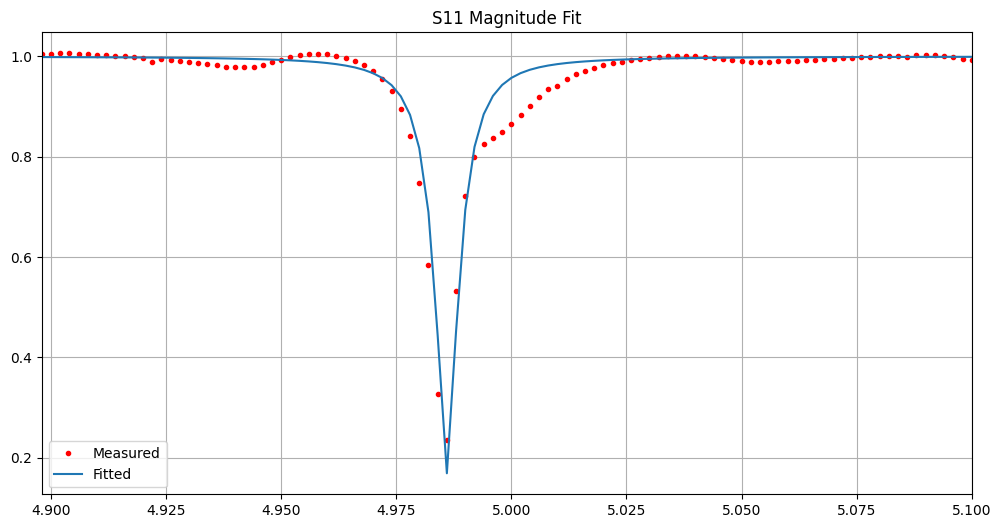

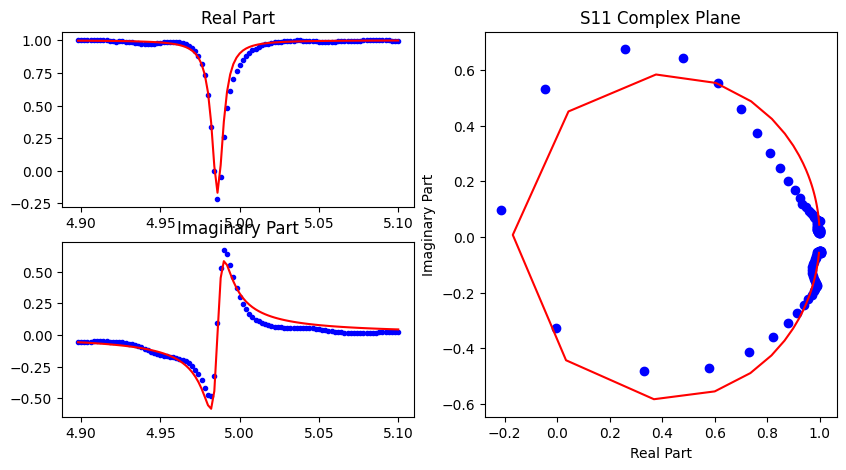

In [41]:
import numpy as np
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
import inspect

# Constants
pi = np.pi
trace_no = 101

def s11(omega, omega_m, alpha, kappa):
    """
    Computes the S11 parameter based on given frequency (omega) and system parameters.
    """
    Gamma = (alpha + kappa) / 2
    s11_value = 1 - (kappa / (Gamma - 1j * (omega - omega_m)))
    return np.hstack([s11_value.real, s11_value.imag])

def fit_s11(frequencies, measured_s11, initial_guess):
    """
    Fits the S11 function to measured data.
    """
    param_names = list(inspect.signature(s11).parameters.keys())[1:]
    
    coeffs, cov = curve_fit(
        s11,
        frequencies,
        ydata=np.hstack([measured_s11.real[::-1], measured_s11.imag[::-1]]),
        bounds=([0, 0, 0], [100, 100, 100]),
        method='dogbox',
        p0=initial_guess,
    )
    
    print('Fitted Parameters:')
    for name, value in zip(param_names, coeffs):
        print(f">> {name} = {value}")
    
    return coeffs

def plot_results(frequencies, measured_s11, fitted_s11):
    """
    Plots the measured and fitted S11 magnitude.
    """
    midpoint = fitted_s11.shape[-1] // 2
    real_part = fitted_s11[:midpoint]
    imag_part = fitted_s11[midpoint:]
    sum_complex = real_part + 1j * imag_part
    
    plt.figure(figsize=(12, 6))
    plt.plot(frequencies, abs(measured_s11), 'r .', label='Measured')
    plt.plot(frequencies, abs(sum_complex)[::-1], label='Fitted')
    plt.xlim(np.min(frequencies), np.max(frequencies))
    plt.legend()
    plt.grid()
    plt.title("S11 Magnitude Fit")
    plt.show()
    
    # Real and Imaginary parts
    plt.figure(figsize=(10, 5))
    plt.subplot(221)
    plt.plot(frequencies, measured_s11.real, 'b.')
    plt.plot(frequencies, real_part[::-1], 'r-')
    plt.title('Real Part')
    
    plt.subplot(223)
    plt.plot(frequencies, measured_s11.imag, 'b.')
    plt.plot(frequencies, imag_part[::-1], 'r-')
    plt.title('Imaginary Part')
    
    plt.subplot(122)
    plt.plot(measured_s11.real, measured_s11.imag, 'bo')
    plt.plot(real_part[::-1], imag_part[::-1], 'r-')
    plt.xlabel('Real Part')
    plt.ylabel('Imaginary Part')
    plt.title("S11 Complex Plane")
    
    plt.show()

def switch_mode(mode, frequencies, measured_s11, initial_guess):
    """
    Switch between coefficient setting mode and fitting mode.
    """
    if mode == "set":
        print("Initial Coefficients:")
        for name, value in zip(["omega_m", "alpha", "kappa"], initial_guess):
            print(f">> {name} = {value}")
        s11_fit = s11(frequencies, *initial_guess)
        plot_results(frequencies, measured_s11, s11_fit)
    elif mode == "fit":
        coeffs = fit_s11(frequencies, measured_s11, initial_guess)
        s11_fit = s11(frequencies, *coeffs)
        plot_results(frequencies, measured_s11, s11_fit)
    else:
        print("Invalid mode. Use 'set' or 'fit'.")

def main():
    """
    Main execution function.
    """
    global frq, data, screen
    f_used = frq[screen] / 1e9
    s11_used = data[screen, trace_no: trace_no+1].ravel()
    
    initial_guess = np.array([4.985, 0.0042, 0.0063])  # Initial parameter estimates
    
    # Switch mode here: "set" for initial coefficients, "fit" for fitting
    mode = "fit"
    switch_mode(mode, f_used, s11_used, initial_guess)

main()


Fitted parameters:
>> omega_m = 5.020548
>> alpha = -0.005298
>> kappa = -0.002931


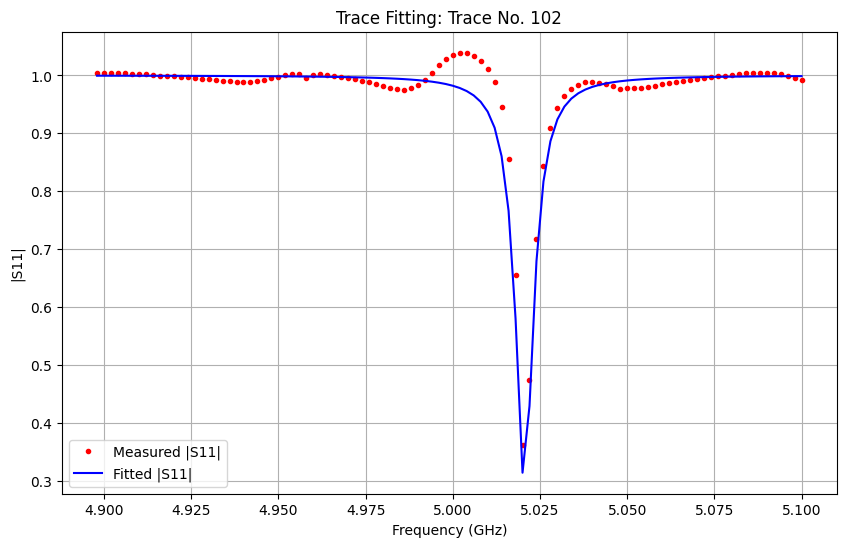

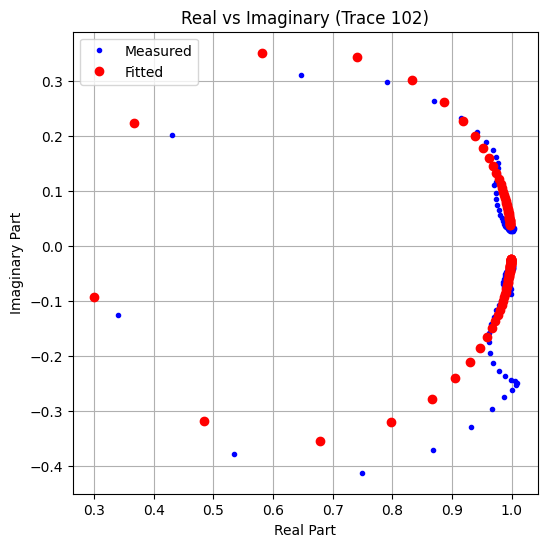

(array([ 5.02054811e+00, -5.29763252e-03, -2.93083072e-03]),
 array([[ 1.25751855e-08, -8.81590068e-12, -5.06704071e-12],
        [-8.81590068e-12,  7.23319129e-08,  1.21884477e-08],
        [-5.06704071e-12,  1.21884477e-08,  6.74308974e-09]]))

In [158]:

import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import inspect


# Define the S11 model
def s11(omega, omega_m, alpha, kappa):
    Gamma = (alpha + kappa) / 2
    s11 = 1 - (kappa / (Gamma - 1j * (omega - omega_m)))
    return np.hstack([s11.real, s11.imag])

# Fitting and Plotting functions
def fit_and_plot(frequencies, s11_data, initial_guess, trace_no):
    # Extract parameter names
    param_names = list(inspect.signature(s11).parameters.keys())[1:]

    # Curve fitting
    coeffs, cov = curve_fit(
        s11,
        frequencies,
        ydata=np.hstack([s11_data.real, s11_data.imag]),
        method='lm',
        p0=initial_guess,
    )

    # Print fitted results
    print("Fitted parameters:")
    for name, value in zip(param_names, coeffs):
        print(f">> {name} = {value:.6f}")
    
    # Reconstruct S11 from fitted data
    s11_fit = s11(frequencies, *coeffs)
    midpoint = s11_fit.shape[-1] // 2
    real_part = s11_fit[:midpoint]
    imag_part = s11_fit[midpoint:]
    s11_reconstructed = real_part + 1j * imag_part

    # Plot results
    plot_results(frequencies, s11_data, s11_reconstructed, trace_no)

    return coeffs, cov

# Plot function
def plot_results(frequencies, measured_data, fitted_data, trace_no):
    plt.figure(figsize=(10, 6))
    
    # Plot measured and fitted data
    plt.plot(frequencies, abs(measured_data), 'r.', label='Measured |S11|')
    plt.plot(frequencies, abs(fitted_data), 'b-', label='Fitted |S11|')
    plt.title(f"Trace Fitting: Trace No. {trace_no}")
    plt.xlabel("Frequency (GHz)")
    plt.ylabel("|S11|")
    plt.legend()
    plt.grid(True)
    plt.savefig('fitting_result.png', dpi=300)
    plt.show()

    # Real vs Imaginary Plot
    plt.figure(figsize=(6, 6))
    plt.plot(measured_data.real, measured_data.imag, 'b.', label='Measured')
    plt.plot(fitted_data.real, fitted_data.imag, 'ro', label='Fitted')
    plt.xlabel('Real Part')
    plt.ylabel('Imaginary Part')
    plt.title(f'Real vs Imaginary (Trace {trace_no})')
    plt.legend()
    plt.grid(True)
    plt.show()


# Constants
pi = np.pi
trace_no = 102

# Simulated input
frequencies = frq[screen] / 1e9  # Convert to GHz
s11_data = data[screen, trace_no: trace_no + 1].ravel()

# Starting parameters and bounds
initial_guess = np.array([5, 0.0042, 0.0041])  # Starting points for parameters
bounds = ([0, 0, 0], [100, 0.1, 1])  # Bounds for omega_m, alpha, kappa

# Fit and plot
fit_and_plot(frequencies, s11_data, initial_guess, trace_no)


fitted result:
>> omega_m = 5.020730785211758
>> alpha = 0.0022533546823408266
>> kappa = 0.004128929460074914


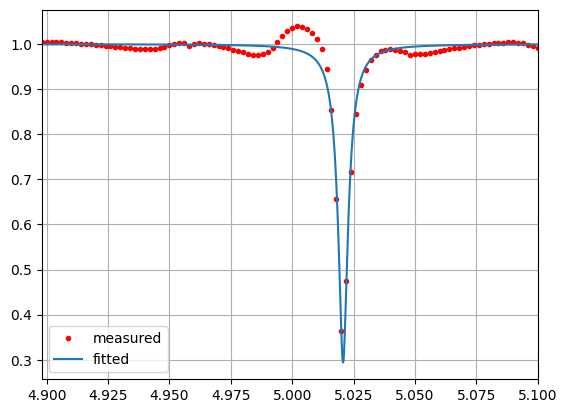

<function matplotlib.pyplot.show(close=None, block=None)>

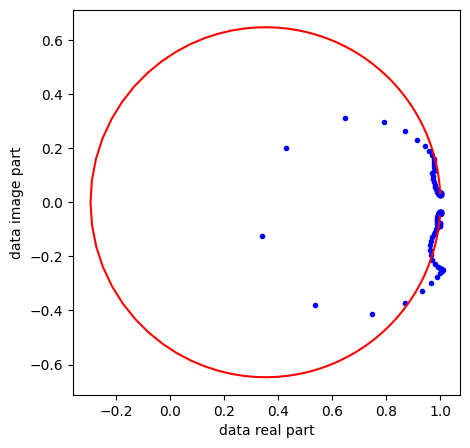

In [153]:
import numpy as np
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
#from sklearn.metrics import r2_score
import inspect

pi = np.pi
trace_no = 102


def S11( omega, omega_m, alpha, kappa):
    Gamma = (alpha + kappa )/ 2
    a =( 1 - (kappa / (Gamma - 1j*(omega - omega_m))))
    return abs(a)

f_used, s11_used = frq[screen]/1e+9,np.array(data[:,trace_no: trace_no+1])[screen]
param_names = list(inspect.signature(S11).parameters.keys())[1:]
f_used1 = f_used.ravel()
s11_used1 = s11_used.ravel()

strpts = np.array([4.986, 0.0042, 0.0063])# starting points

coeffs1, cov1 = curve_fit(
    S11,
    f_used1,
    abs(s11_used[:,0]),
    p0=strpts,
    
    method = 'lm',
    maxfev = 20000
)
#omega_c1, omega_m1, kappa1, gamma1, c1  = coeffs

print('fitted result:')
for name, value in zip(param_names, coeffs1):
    print(f">> {name} = {value}")   
        
#y_pred = abs_s21(f_used, *coeffs)
#R2 = r2_score(s21_measured, y_pred)
#print(f'with R-squared value R^2 = {R2:.4f}')
omega = np.linspace(f_used.min(),f_used.max(),1000)
s11_fit = S11(omega, *coeffs1)

plt.plot(f_used, abs(s11_used1), 'r .', label='measured')
plt.plot(omega, abs(s11_fit), label='fitted')
plt.xlim(np.min(f_used), np.max(f_used))
#plt.title(f'Trace Fitting tr.{trace_no}')
plt.legend()
plt.grid()
#plt.savefig('fitting_result.png', dpi =300)
plt.show() 


plt.figure(figsize=(5,5))
plt.plot(np.real(data[:, trace_no:trace_no+1])[screen], np.imag(data[:, trace_no:trace_no+1])[screen],'b.')
plt.plot(np.real(s11_ttest( omega, *coeffs1)), np.imag(s11_ttest( omega, *coeffs1)),'r-')
plt.xlabel('data real part')
plt.ylabel('data image part')
plt.title
plt.show


# 取平均值

In [41]:
for name, value in zip(param_names, CCoeffs.T):
        print(f">> {name} = {np.mean(value)/(2*pi)}")
        print(f">>err of {name} = {np.std(value/(2*pi))}")
        
        
#print(f">> {name} = {np.mean(CCoeffs[:,i]/(2*pi))}")
#        print(f">>err of {name} = {np.std(CCoeffs[:,i]/(2*pi))}")

>> omega_c = 3.4683207820519795
>>err of omega_c = 0.0007953420773105808
>> omega_m = 3.455741419402673
>>err of omega_m = 0.012514998264309445
>> kappa = 0.0006771987298274128
>>err of kappa = 1.2889389444351403e-05
>> alpha = 0.005927061937262713
>>err of alpha = 0.001013958827828443
>> beta = 0.011979713395370913
>>err of beta = 0.0014111402744464987
>> gamma = 0.02244872974392687
>>err of gamma = 0.000282110946756818


# 畫出S21

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
#from sklearn.metrics import r2_score
import inspect


def abs_s21(f,omega_c, omega_m, kappa, alpha, beta, gamma):
    omega = 2 * np.pi * f
    S_21 = - kappa / (1j*(omega - omega_c)-(kappa+beta)+ gamma**2/(1j*(omega - omega_m)-alpha) )
    return abs(S_21)

